### Лабораторна робота №5
### Студента групи МІТ-31
### Кульчицького Дмитра

# Завдання
1.  Виконати вирішення задач регресії та класифікації для наборів даних, що використовувалися в лабораторних роботах 2,3 з використанням Tensorflow & NN
2.  Отримані результати викласти на github у репозиторій ml2021 в основну (default) гілку в папці Lab5.

In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import mae, mse
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import matplotlib as mplt
import sklearn.model_selection
import sklearn.datasets
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix
import random

In [38]:
model_1 = pd.read_csv("./data.csv")

In [39]:
model_1.head()

,Unnamed: 0,salary,age,degree,gender,credits,is_gamer
0,0,3996,0,0,1,1,0
1,1,1016,1,0,0,0,0
2,2,420,0,1,0,1,1
3,3,2893,1,1,0,0,1
4,4,4010,1,0,0,1,1


In [40]:
model_1.isna().sum()

Unnamed: 0    0
salary        0
age           0
degree        0
gender        0
credits       0
is_gamer      0
dtype: int64

In [41]:
insurance=pd.get_dummies(model_1)
insurance.head(19)

,Unnamed: 0,salary,age,degree,gender,credits,is_gamer
0,0,3996,0,0,1,1,0
1,1,1016,1,0,0,0,0
2,2,420,0,1,0,1,1
3,3,2893,1,1,0,0,1
4,4,4010,1,0,0,1,1
5,5,2109,0,0,1,1,1
6,6,752,1,1,1,0,0
7,7,4269,1,1,0,0,0
8,8,294,1,0,1,1,0
9,9,2727,0,1,1,1,0


In [42]:
X=insurance.drop("salary",axis=1)
y=insurance["salary"]

X.head(), y.head()

(   Unnamed: 0  age  degree  gender  credits  is_gamer
 0           0    0       0       1        1         0
 1           1    1       0       0        0         0
 2           2    0       1       0        1         1
 3           3    1       1       0        0         1
 4           4    1       0       0        1         1,
 0    3996
 1    1016
 2     420
 3    2893
 4    4010
 Name: salary, dtype: int64)

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=48)


tf.random.set_seed=13

model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss='mse',
    optimizer=Adam(),
    metrics=['mse']
)

X_train.shape

(266, 6)

In [44]:
history = model.fit(X_train,y_train,epochs=10)

Epoch 1/10
9/9 [==============================] - 0s 1ms/step - loss: 9005649.0000 - mse: 9005649.0000
Epoch 2/10
9/9 [==============================] - 0s 1ms/step - loss: 8958107.0000 - mse: 8958107.0000
Epoch 3/10
9/9 [==============================] - 0s 1ms/step - loss: 8911779.0000 - mse: 8911779.0000
Epoch 4/10
9/9 [==============================] - 0s 1000us/step - loss: 8865580.0000 - mse: 8865580.0000
Epoch 5/10
9/9 [==============================] - 0s 1ms/step - loss: 8818467.0000 - mse: 8818467.0000
Epoch 6/10
9/9 [==============================] - 0s 875us/step - loss: 8771087.0000 - mse: 8771087.0000
Epoch 7/10
9/9 [==============================] - 0s 1000us/step - loss: 8723542.0000 - mse: 8723542.0000
Epoch 8/10
9/9 [==============================] - 0s 1ms/step - loss: 8676030.0000 - mse: 8676030.0000
Epoch 9/10
9/9 [==============================] - 0s 1000us/step - loss: 8626134.0000 - mse: 8626134.0000
Epoch 10/10
9/9 [==============================] - 0s 1000us/s

In [45]:
history2 = model.fit(X_train,y_train,epochs=200, verbose=0)

score1=model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 1ms/step - loss: 3495139.5000 - mse: 3495139.5000


In [46]:
model.save("model.h5")

loaded_model=tf.keras.models.load_model("model.h5")


y1=model.predict(X_test)
y2=loaded_model.predict(X_test)

(y1-y2).sum()

X_train.head()

,Unnamed: 0,age,degree,gender,credits,is_gamer
58,58,1,1,1,0,1
259,259,0,1,1,0,1
95,95,0,0,0,0,0
131,131,1,0,1,1,0
286,286,1,1,1,1,0


In [47]:
insurance2 = model_1
insurance2.head(19)

,Unnamed: 0,salary,age,degree,gender,credits,is_gamer
0,0,3996,0,0,1,1,0
1,1,1016,1,0,0,0,0
2,2,420,0,1,0,1,1
3,3,2893,1,1,0,0,1
4,4,4010,1,0,0,1,1
5,5,2109,0,0,1,1,1
6,6,752,1,1,1,0,0
7,7,4269,1,1,0,0,0
8,8,294,1,0,1,1,0
9,9,2727,0,1,1,1,0


In [48]:
ct = make_column_transformer(
    (MinMaxScaler(),["age", "degree","gender"]), 
    (OneHotEncoder(handle_unknown="ignore"),['credits','is_gamer'])
)
X=insurance2.drop("salary", axis=1)
y = insurance2["salary"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

ct.fit(X_train)

X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)

im3= tf.keras.Sequential([ 
    
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

In [49]:
im3.compile(
    loss=mae, 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["mae"]
)
history_im3=im3.fit(X_train_norm,y_train,validation_split=0.3,epochs=30,verbose=0)

im3.evaluate(X_test_norm,y_test)

X_train.shape

3/3 [==============================] - 0s 1ms/step - loss: 2472.4973 - mae: 2472.4973


(266, 6)

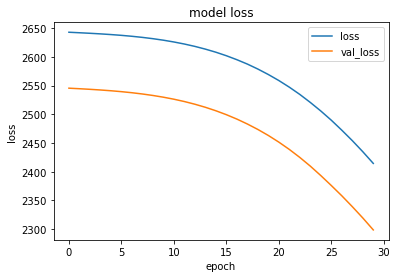

In [50]:
plt.plot(history_im3.history['loss'])
plt.plot(history_im3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

In [51]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [52]:
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [53]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [54]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

In [55]:
train_labels[7]

2

In [56]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

In [57]:
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3433 - accuracy: 0.0999 - val_loss: 2.3027 - val_accuracy: 0.0999
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 2s 941us/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 2s 942us/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 2s 977us/step - loss: 2.3028 - accuracy: 0.0957 - val_loss: 2.3026 - val_accuracy: 0.0999
Epoch 6/10
1875/1875 [==============================] - 2s 966us/step - loss: 2.3028 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3027 - val_a

In [58]:
train_data.min(), train_data.max()
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [59]:
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 978us/step - loss: 0.9756 - accuracy: 0.6369 - val_loss: 0.7125 - val_accuracy: 0.7518
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6485 - accuracy: 0.7728 - val_loss: 0.6435 - val_accuracy: 0.7699
Epoch 3/10
1875/1875 [==============================] - 2s 974us/step - loss: 0.6038 - accuracy: 0.7898 - val_loss: 0.6124 - val_accuracy: 0.7855
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5782 - accuracy: 0.7994 - val_loss: 0.6070 - val_accuracy: 0.7857
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5625 - accuracy: 0.8029 - val_loss: 0.5847 - val_accuracy: 0.7957
Epoch 6/10
1875/1875 [==============================] - 2s 971us/step - loss: 0.5475 - accuracy: 0.8103 - val_loss: 0.5762 - val_accuracy: 0.8021
Epoch 7/10
1875/1875 [==============================] - 2s 935us/step - loss: 0.5379 - accuracy: 0.8139 - val_loss: 0.5658 - val_a

<AxesSubplot:title={'center':'Normalized data'}>

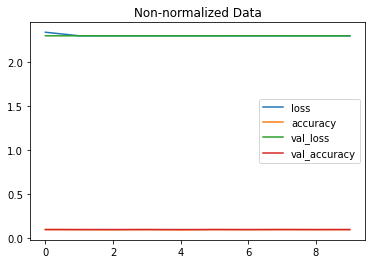

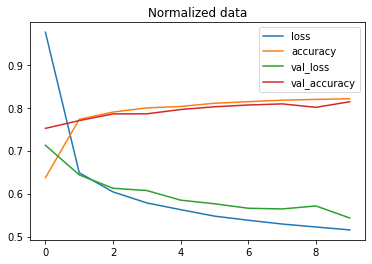

In [60]:
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
pd.DataFrame(norm_history.history).plot(title="Normalized data")

In [61]:
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0550 - accuracy: 0.6266 - val_loss: 0.7174 - val_accuracy: 0.7513
Epoch 2/40
1875/1875 [==============================] - 2s 951us/step - loss: 0.6242 - accuracy: 0.7755 - val_loss: 0.6145 - val_accuracy: 0.7787
Epoch 3/40
1875/1875 [==============================] - 2s 952us/step - loss: 0.5637 - accuracy: 0.7986 - val_loss: 0.5792 - val_accuracy: 0.7955
Epoch 4/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5418 - accuracy: 0.8083 - val_loss: 0.5639 - val_accuracy: 0.8049
Epoch 5/40
1875/1875 [==============================] - 2s 965us/step - loss: 0.5275 - accuracy: 0.8133 - val_loss: 0.5664 - val_accuracy: 0.8008
Epoch 6/40
1875/1875 [==============================] - 2s 970us/step - loss: 0.5222 - accuracy: 0.8156 - val_loss: 0.5484 - val_accuracy: 0.8121
Epoch 7/40
1875/1875 [==============================] - 2s 947us/step - loss: 0.5141 - accuracy: 0.8198 - val_loss: 0.5403 - val

Text(0.5, 1.0, 'Finding the ideal learning rate')

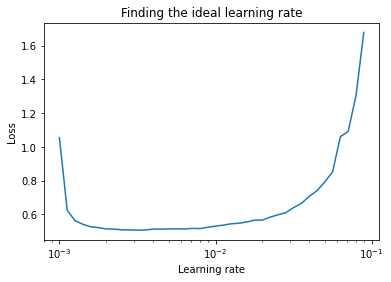

In [62]:

lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [63]:
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2753 - accuracy: 0.5406 - val_loss: 0.9431 - val_accuracy: 0.6781
Epoch 2/20
1875/1875 [==============================] - 2s 944us/step - loss: 0.8242 - accuracy: 0.7144 - val_loss: 0.7800 - val_accuracy: 0.7298
Epoch 3/20
1875/1875 [==============================] - 2s 933us/step - loss: 0.7158 - accuracy: 0.7524 - val_loss: 0.7011 - val_accuracy: 0.7593
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6572 - accuracy: 0.7710 - val_loss: 0.6736 - val_accuracy: 0.7611
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6274 - accuracy: 0.7765 - val_loss: 0.6478 - val_accuracy: 0.7680
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6093 - accuracy: 0.7822 - val_loss: 0.6504 - val_accuracy: 0.7634
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5972 - accuracy: 0.7851 - val_loss: 0.6187 - val_accur

In [64]:
y_probs = model_14.predict(test_data)

y_probs[:5]

array([[6.3653069e-14, 4.2576565e-14, 1.1268010e-18, 1.6185962e-11,
        1.8563620e-20, 5.6656605e-01, 5.1754386e-15, 1.2881352e-01,
        1.9504183e-05, 3.0460092e-01],
       [3.5353124e-04, 2.7045838e-17, 9.2019975e-01, 9.9474518e-09,
        3.1062886e-03, 5.3286982e-11, 7.4743778e-02, 2.2075092e-25,
        1.5965971e-03, 1.7643473e-27],
       [2.3534498e-04, 9.7461545e-01, 5.1573108e-05, 2.3192368e-02,
        8.2236511e-04, 3.7620755e-04, 3.8508885e-04, 2.7809470e-04,
        1.5318812e-05, 2.8122215e-05],
       [2.3534498e-04, 9.7461545e-01, 5.1573108e-05, 2.3192368e-02,
        8.2236511e-04, 3.7620755e-04, 3.8508885e-04, 2.7809470e-04,
        1.5318812e-05, 2.8122215e-05],
       [1.3928631e-01, 6.1061280e-07, 2.8010017e-01, 1.6671641e-02,
        2.3764741e-02, 3.3263412e-05, 5.2842879e-01, 1.6437042e-12,
        1.1714537e-02, 7.8839955e-12]], dtype=float32)

In [65]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(5, 'Sandal')

In [66]:
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([5, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [67]:
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[725,   2,  11, 110,   3,   0, 133,   0,  16,   0],
       [  0, 944,   0,  36,  14,   1,   4,   0,   1,   0],
       [ 14,   5, 552,  17, 191,   0, 217,   0,   4,   0],
       [ 24,  10,   4, 834,  22,   3,  99,   0,   4,   0],
       [  0,   3, 133,  24, 739,   0,  98,   0,   3,   0],
       [  0,   0,   0,   2,   0, 915,   0,  44,  11,  28],
       [164,   2, 202,  68, 122,   0, 427,   0,  15,   0],
       [  0,   0,   0,   0,   0,  44,   0, 933,   0,  23],
       [  8,   3,  16,   9,   5,   7,  15,   4, 933,   0],
       [  0,   0,   0,   0,   0,  33,   0,  64,   1, 902]], dtype=int64)

In [68]:
def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))
  
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

In [69]:
model_14.layers

In [70]:
weights, biases = model_14.layers[1].get_weights()

weights, weights.shape

(array([[ 0.12543926, -0.9159755 ,  0.08169277,  0.77459747],
        [-1.048328  , -0.7493503 ,  1.1854899 ,  0.65668905],
        [-0.61175746, -0.8877779 ,  1.0642947 ,  0.8359278 ],
        ...,
        [ 0.41317233, -0.263374  , -0.06664342,  0.16718185],
        [ 0.8146148 , -0.8455623 ,  0.49445802,  0.19093671],
        [ 0.04264412, -0.15983309, -0.7762357 ,  0.36748567]],
       dtype=float32),
 (784, 4))

In [71]:
biases, biases.shape

(array([ 0.49726447,  2.4919238 ,  1.7483767 , -0.59155536], dtype=float32),
 (4,))

In [72]:
model_14.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_32 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_33 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________
